# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import  silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import pandas as pd
from scipy.stats import mode
from scipy.stats import kurtosis
from scipy.stats import skew
import itertools
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Loading datasets

## Load Breast Cancer Dataset

In [2]:
# Read breast Cancer dataset from csv file
bc_dataset = pd.read_csv("../data/breast_cancer_dataset.csv")
# Map diagnosis column to integer value: 0, 1, drop the id, and diagnosis columns
data = bc_dataset.copy()
data["diagnosis"] = bc_dataset["diagnosis"].map({"M": 1, "B":0})
X = data.drop(['id', 'diagnosis'], axis=1)
y = data["diagnosis"]
# Scaling the dataset using zero mean and unit variance scaling
X_scaled = scale(X)

## Load Ovarian Cancer Dataset

In [3]:
# Read Ovarian Cancer dataset from csv file
oc_dataset = pd.read_csv("../data/ovarian_cancer_dataset.csv")
# remove two features CA72-4 and NEU based on assignment 1 together with
# SUBJECT_ID will be removed from the dataset, also rows with missing data will also be removed from the dataset
oc_dataset= oc_dataset.drop(["SUBJECT_ID", "CA72-4", "NEU"], axis=1)
oc_dataset = oc_dataset.dropna(axis=0)
oc_label = oc_dataset.TYPE
oc_dataset.shape
# Scaling the dataset 
oc_dataset_scaled = scale(oc_dataset)

# Part I: Clustering

## K-means clustering

### K-means clustering on breast cancer dataset

Text(0.5, 1.0, 'Elbow curve of breast cancer dataset')

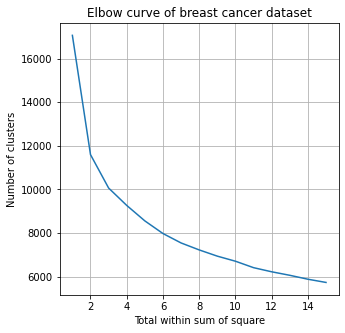

In [4]:
# find k using elbow method
distorsions = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    distorsions.append(kmeans.inertia_)   

fig = plt.figure(figsize=(5, 5))
plt.plot(range(1, 16), distorsions)
plt.grid(True)
plt.xlabel("Total within sum of square")
plt.ylabel("Number of clusters")
plt.title('Elbow curve of breast cancer dataset')


Text(0.5, 1.0, 'Silhouette score for vs. K of Breast Cancer dataset')

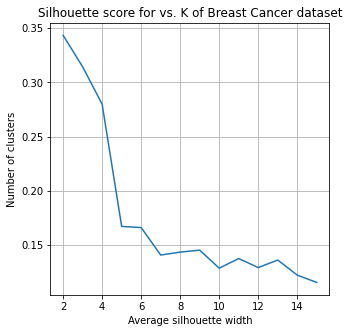

In [5]:
# find k using silhouette method
silhouette_avg = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg.append( silhouette_score(X_scaled, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 16), silhouette_avg)
plt.grid(True)
plt.xlabel("Average silhouette width")
plt.ylabel("Number of clusters")
plt.title('Silhouette score for vs. K of Breast Cancer dataset')

Text(0.5, 1.0, 'Davies Bouldin score vs. K of Breast Cancer dataset')

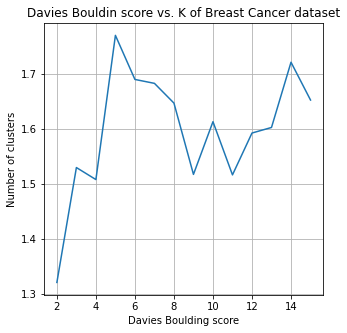

In [6]:
# Davies Bouldin score for K means
davies_boulding_avg = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.fit_predict(X_scaled)
    davies_boulding_avg.append( davies_bouldin_score(X_scaled, cluster_labels))
    
fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 16), davies_boulding_avg)
plt.grid(True)
plt.xlabel("Davies Boulding score")
plt.ylabel("Number of clusters")
plt.title('Davies Bouldin score vs. K of Breast Cancer dataset')

In [7]:
#Build the KMeans Model on Breast Cancer dataset
kmeans = KMeans(n_clusters=2)
bclusters_k = kmeans.fit_predict(X_scaled)  
acc = adjusted_rand_score(y, bclusters_k)
print("Accuracy {}".format(acc))


Accuracy 0.6707206476880808


In [8]:
bc_data = PCA(2).fit_transform(X_scaled)


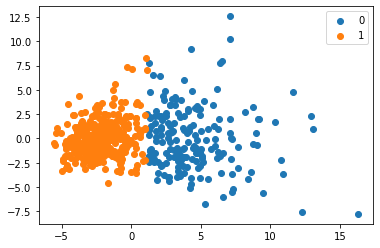

In [9]:
#Getting unique labels
 
u_labels = np.unique(bclusters_k)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(bc_data[bclusters_k == i , 0] , bc_data[bclusters_k == i , 1] , label = i)
plt.legend()
plt.show()

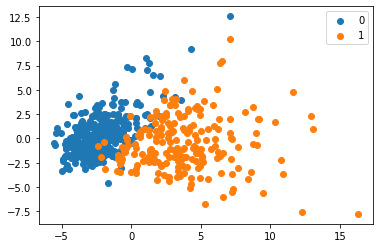

In [10]:
#Getting unique labels
 
u_labels = np.unique(y)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(bc_data[y == i , 0] , bc_data[y == i , 1] , label = i)
plt.legend()
plt.show()

### K-means clustering on Ovarian Cancer dataset

Text(0.5, 1.0, 'Elbow curve of Ovarian Cancer dataset')

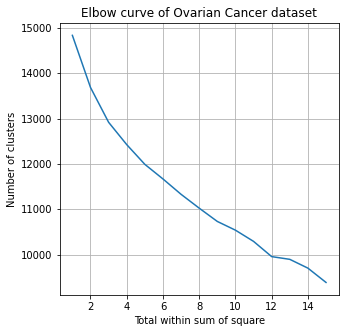

In [11]:
# find k using elbow method
oc_distorsions = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(oc_dataset_scaled)
    oc_distorsions.append(kmeans.inertia_)  
    
fig = plt.figure(figsize=(5, 5))
plt.plot(range(1, 16), oc_distorsions)
plt.grid(True)
plt.xlabel("Total within sum of square")
plt.ylabel("Number of clusters")
plt.title('Elbow curve of Ovarian Cancer dataset')

Text(0.5, 1.0, 'Silhouette score for vs. K of Ovarian Cancer dataset')

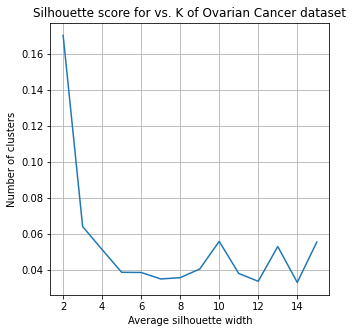

In [12]:
# find k using silhouette method
oc_silhouette_avg = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(oc_dataset_scaled)
    cluster_labels = kmeans.fit_predict(oc_dataset_scaled)
    oc_silhouette_avg.append( silhouette_score(oc_dataset_scaled, cluster_labels))
    
fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 16), oc_silhouette_avg)
plt.grid(True)
plt.xlabel("Average silhouette width")
plt.ylabel("Number of clusters")
plt.title('Silhouette score for vs. K of Ovarian Cancer dataset')


Text(0.5, 1.0, 'Davies Bouldin score vs. K of Ovarian Cancer dataset')

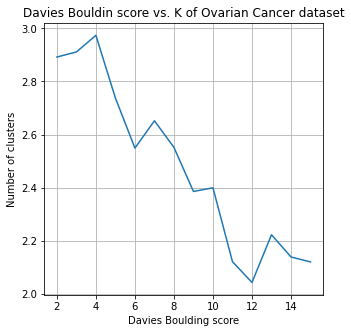

In [13]:
# Davies Bouldin score for K means
oc_davies_boulding_avg = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(oc_dataset_scaled)
    cluster_labels = kmeans.fit_predict(oc_dataset_scaled)
    oc_davies_boulding_avg.append( davies_bouldin_score(oc_dataset_scaled, cluster_labels))
    
fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 16), oc_davies_boulding_avg)
plt.grid(True)
plt.xlabel("Davies Boulding score")
plt.ylabel("Number of clusters")
plt.title('Davies Bouldin score vs. K of Ovarian Cancer dataset')

In [14]:
#Build the KMeans Model on Ovarian Cancer dataset
kmeans = KMeans(n_clusters=2)
best_kmean = kmeans.fit(oc_dataset_scaled)
oclusters_k = kmeans.fit_predict(oc_dataset_scaled)    
acc_oc = adjusted_rand_score(oc_label, oclusters_k)
print("Accuracy {}".format(acc_oc))

Accuracy 0.36359140486715996


In [15]:
oc_data = PCA(2).fit_transform(oc_dataset_scaled)

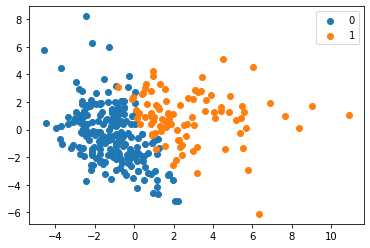

In [16]:
#Getting unique labels
 
u_labels = np.unique(oclusters_k)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(oc_data[oclusters_k == i , 0] , oc_data[oclusters_k == i , 1] , label = i)
plt.legend()
plt.show()

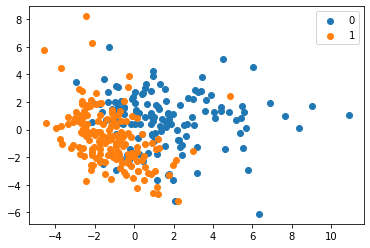

In [17]:
#Getting unique labels
 
u_labels = np.unique(oc_label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(oc_data[oc_label == i , 0] , oc_data[oc_label == i , 1] , label = i)
plt.legend()
plt.show()

## Expectation Maximization

### EM clustering on Breast Cancer dataset

In [18]:
# Scaling the dataset using zero mean and unit variance scaling on Breast Cancer dataset
scaler = StandardScaler()
scaler.fit(X)
bc_dataset_scaled = scaler.transform(X)

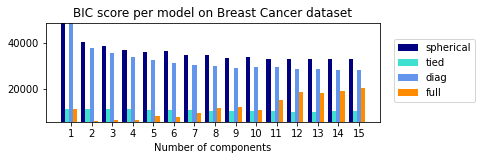

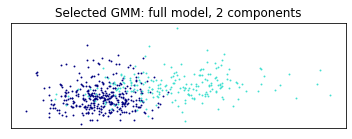

In [19]:
# Generate random sample, two components on breast cancer dataset
np.random.seed(0)

lowest_bic = np.infty
bic = []
n_components_range = range(1, 16)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(bc_dataset_scaled)
        bic.append(gmm.bic(bc_dataset_scaled))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model on Breast Cancer dataset')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))

spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types, loc=(1.04, 0.2))
plt.show()
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(bc_dataset_scaled)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
#     print(cov)
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
    plt.scatter(bc_dataset_scaled[Y_ == i, 0], bc_dataset_scaled[Y_ == i, 1], .8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180. * angle / np.pi  # convert to degrees
#     v = 2. * np.sqrt(2.) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [20]:
#Build em on breast cancer dataset
gmm = GaussianMixture(n_components=2, covariance_type="full")
bclusters_gmm = gmm.fit_predict(bc_dataset_scaled)

acc_gmm = adjusted_rand_score(y, bclusters_gmm)
print("Accuracy {}".format(acc_gmm))

Accuracy 0.7740159832538671


### EM clustering on Ovarian Cancer dataset

In [21]:
# Scaling the ovarian cancer dataset using zero mean and unit variance scaling
scaler = StandardScaler()
scaler.fit(oc_dataset)
oc_dataset_scaled = scaler.transform(oc_dataset)

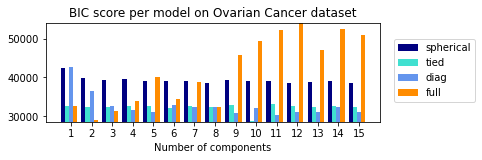

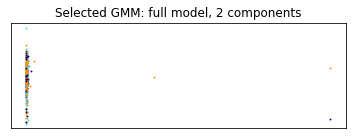

In [22]:
# Generate random sample, two components
np.random.seed(0)

lowest_bic = np.infty
bic = []
n_components_range = range(1, 16)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(oc_dataset_scaled)
        bic.append(gmm.bic(oc_dataset_scaled))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []


# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model on Ovarian Cancer dataset')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))

spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types, loc=(1.04, 0.2))
plt.show()

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(oc_dataset_scaled)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
#     print(cov)
#     print(i)
#     v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(oc_dataset_scaled[Y_ == i, 0], oc_dataset_scaled[Y_ == i, 1], .8, color=color)
    
#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180. * angle / np.pi  # convert to degrees
#     v = 2. * np.sqrt(2.) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(.5)
#     splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [23]:
oc_data = PCA(2).fit_transform(oc_dataset_scaled)
gmm = GaussianMixture(n_components=9, covariance_type="full")
label = gmm.fit_predict(oc_data)


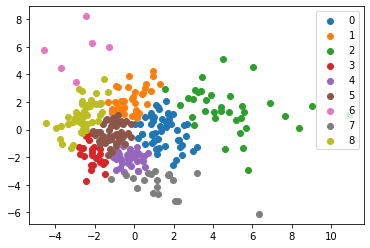

In [24]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(oc_data[label == i , 0] , oc_data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [25]:
gmm = GaussianMixture(n_components=2, covariance_type="full")
olabel_gm = gmm.fit_predict(oc_data)

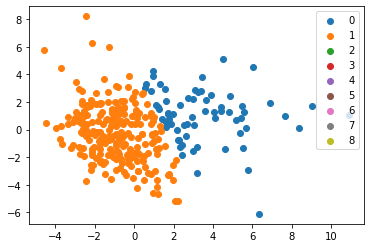

In [26]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(oc_data[olabel_gm == i , 0] , oc_data[olabel_gm == i , 1] , label = i)
plt.legend()
plt.show()

In [27]:
#Build em on ovarian cancer dataset
gmm = GaussianMixture(n_components=2, covariance_type="full")
clusters_gmm = gmm.fit_predict(oc_dataset_scaled)

acc_gmm = adjusted_rand_score(oc_label, clusters_gmm)
print("Accuracy {}".format(acc_gmm))

Accuracy 0.18652037116457265


Text(553.7838235294118, 0.5, 'PCA 2')

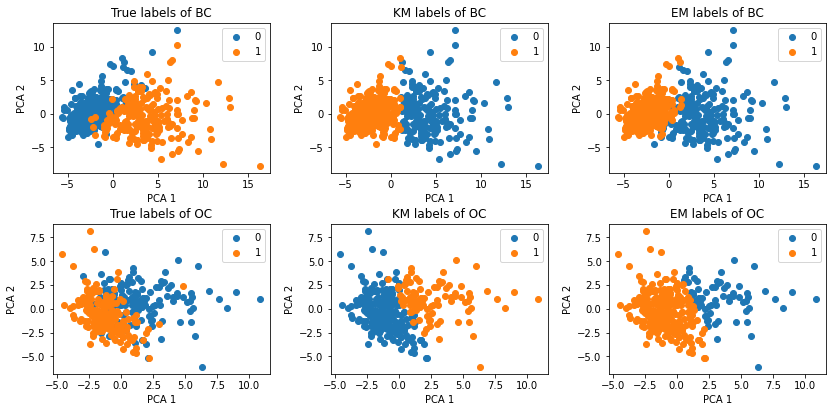

In [28]:
#Summary plot of KM and EM
fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 6))
fig1.tight_layout(pad=3.0)
# true label of BC plot against first and second pca
#Getting unique labels
u_labels1 = np.unique(y)
#plotting the results:
for i in u_labels1:
    ax1.scatter(bc_data[y == i , 0] , bc_data[y == i , 1] , label = i)
ax1.legend()
ax1.set_title("True labels of BC")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

# k-means label of BC plot against first and second pca
#Getting unique labels
u_labels2 = np.unique(bclusters_k)
 
#plotting the results:
 
for i in u_labels2:
    ax2.scatter(bc_data[bclusters_k == i , 0] , bc_data[bclusters_k == i , 1] , label = i)
ax2.legend()
ax2.set_title("KM labels of BC")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

# k-means label of BC plot against first and second pca
#Getting unique labels
u_labels3 = np.unique(bclusters_gmm)
 
#plotting the results:
 
for i in u_labels3:
    ax3.scatter(bc_data[bclusters_gmm == i , 0] , bc_data[bclusters_gmm == i , 1] , label = i)
ax3.legend()
ax3.set_title("EM labels of BC")
ax3.set_xlabel("PCA 1")
ax3.set_ylabel("PCA 2")


# true label of OC plot against first and second pca
#Getting unique labels
u_labels4 = np.unique(oc_label)
#plotting the results:
for i in u_labels4:
    ax4.scatter(oc_data[oc_label == i , 0] , oc_data[oc_label == i , 1] , label = i)
ax4.legend()
ax4.set_title("True labels of OC")
ax4.set_xlabel("PCA 1")
ax4.set_ylabel("PCA 2")

# km label of OC plot against first and second pca
#Getting unique labels
u_labels5 = np.unique(oclusters_k)
#plotting the results:
for i in u_labels5:
    ax5.scatter(oc_data[oclusters_k == i , 0] , oc_data[oclusters_k == i , 1] , label = i)
ax5.legend()
ax5.set_title("KM labels of OC")
ax5.set_xlabel("PCA 1")
ax5.set_ylabel("PCA 2")

# em label of OC plot against first and second pca
#Getting unique labels
u_labels6 = np.unique(olabel_gm)
#plotting the results:
for i in u_labels6:
    ax6.scatter(oc_data[olabel_gm == i , 0] , oc_data[olabel_gm == i , 1] , label = i)
ax6.legend()
ax6.set_title("EM labels of OC")
ax6.set_xlabel("PCA 1")
ax6.set_ylabel("PCA 2")

# Part II: Dimensionality Reduction

## Dimensionality Reduction on Breast Cancer dataset

### Principal Component Analysis

In [29]:
#Reconstruction Error
def inverse_transform_rp(rp, X_transformed, X_train):
    return X_transformed.dot(rp.components_) + np.mean(X_train, axis = 0)

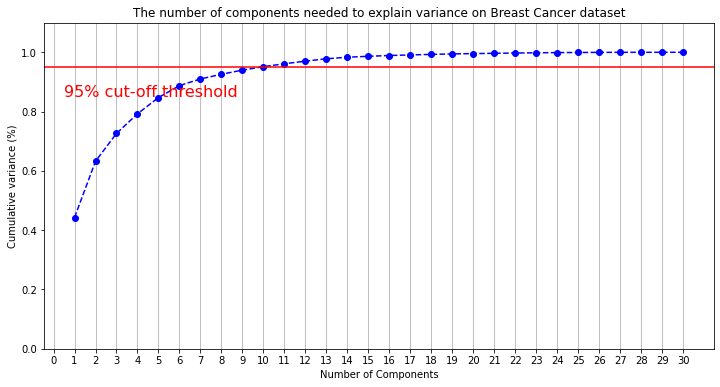

In [30]:
pca = PCA().fit(bc_dataset_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance on Breast Cancer dataset')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [31]:
# get raw eigen_vals
cov_mat = np.cov(bc_dataset_scaled.T)
# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)

Raw Eigenvalues: 
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


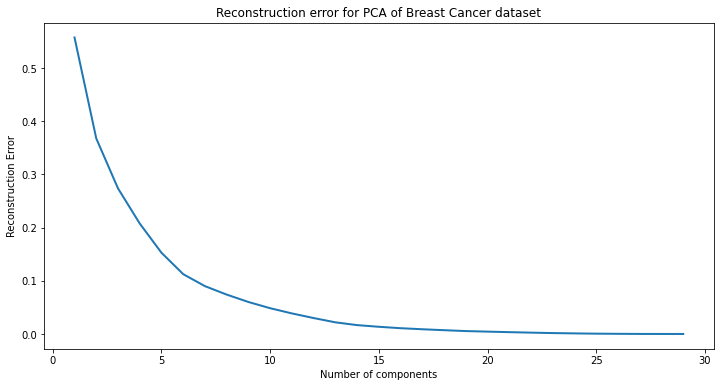

In [32]:
#Reconstruction Error
reconstruction_error = []
n_components = np.arange(1, 30, 1)
for comp in n_components:
    rp = PCA(n_components = comp)
    X_transformed = rp.fit_transform(bc_dataset_scaled)
    X_projected = inverse_transform_rp(rp, X_transformed, bc_dataset_scaled)
    reconstruction_error.append(((bc_dataset_scaled - X_projected) ** 2).mean())

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for PCA of Breast Cancer dataset')
plt.show()

### Independent Component Analysis

In [33]:
# calculate kurtosis and skewness of features
kurtosis_bc = kurtosis(bc_dataset_scaled)
skewness_bc = skew(bc_dataset_scaled)
print(kurtosis_bc)
print(skewness_bc)

[ 0.82758367  0.74114542  0.95316505  3.60976126  0.83794535  1.62513952
  1.97059165  1.04668022  1.26611697  2.9690169  17.52116219  5.29175289
 21.20377481 48.76719561 10.3675372   5.05096602 48.42256209  5.07083973
  7.81638799 26.03994977  0.9252876   0.21180938  1.05024268  4.3473308
  0.50275975  3.00212021  1.59056807 -0.54136707  4.39507329  5.18811128]
[0.93989345 0.64873357 0.98803695 1.64139051 0.45511992 1.18698332
 1.39748324 1.16809035 0.72369472 1.30104739 3.08046399 1.64210026
 3.43453047 5.43281586 2.30834422 1.89720239 5.09698095 1.44086689
 2.18934184 3.91361665 1.10020504 0.49700667 1.12518762 1.85446799
 0.41433005 1.46966746 1.14720234 0.49131594 1.43014487 1.65819316]


Text(0.5, 1.0, 'Kurtosis/Skewness vs features on Breast Cancer dataset')

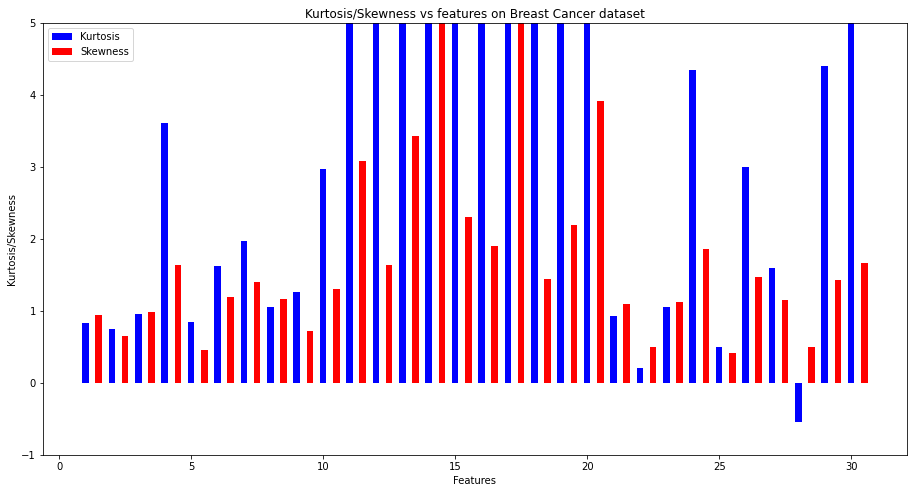

In [34]:
x = np.arange(1, 31, step=1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x + 0, kurtosis_bc, color = 'b', width = 0.25)
ax.bar(x + 0.5, skewness_bc, color = 'r', width = 0.25)
plt.ylim(-1, 5);
ax.legend(labels=['Kurtosis', 'Skewness'])
plt.xlabel("Features")
plt.ylabel("Kurtosis/Skewness")
plt.title("Kurtosis/Skewness vs features on Breast Cancer dataset")

d:\python_projects\cs7641_hw3\venv\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


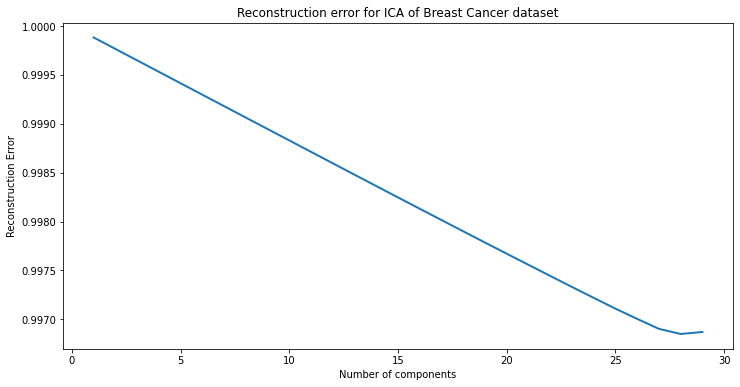

In [35]:
#Reconstruction Error of ICA
reconstruction_error = []
n_components = np.arange(1, 30, 1)
for comp in n_components:
    rp = FastICA(n_components = comp)
    X_transformed = rp.fit_transform(bc_dataset_scaled)
    X_projected = inverse_transform_rp(rp, X_transformed, bc_dataset_scaled)
    reconstruction_error.append(((bc_dataset_scaled - X_projected) ** 2).mean())

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for ICA of Breast Cancer dataset')
plt.show()


### Random Projection Analysis

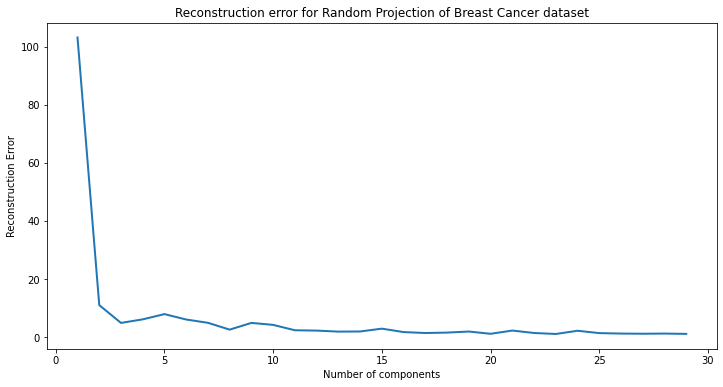

In [36]:
#Reconstruction Error
reconstruction_error = []
n_components = np.arange(1, 30, 1)
for comp in n_components:
    rp = GaussianRandomProjection(n_components = comp)
    X_transformed = rp.fit_transform(bc_dataset_scaled)
    X_projected = inverse_transform_rp(rp, X_transformed, bc_dataset_scaled)
    reconstruction_error.append(((bc_dataset_scaled - X_projected) ** 2).mean())

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for Random Projection of Breast Cancer dataset')
plt.show()


### Select features using Decision Tree feature importance

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')


<AxesSubplot:>

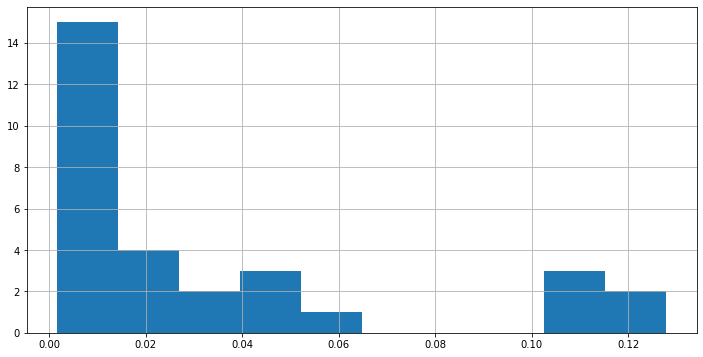

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
bc_sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
bc_sel.fit(X_train, y_train)
bc_sel.get_support()
bc_selected_feat= X_train.columns[(bc_sel.get_support())]
print(bc_selected_feat)
pd.Series(bc_sel.estimator_.feature_importances_.ravel()).hist()

In [38]:
X_selected = X[bc_selected_feat]
X_selected_scaled = scale(X_selected)
bc_data_dt = PCA(2).fit_transform(X_selected_scaled)

## Dimensionality Reduction on Ovarian Cancer dataset

### Principal Component Analysis

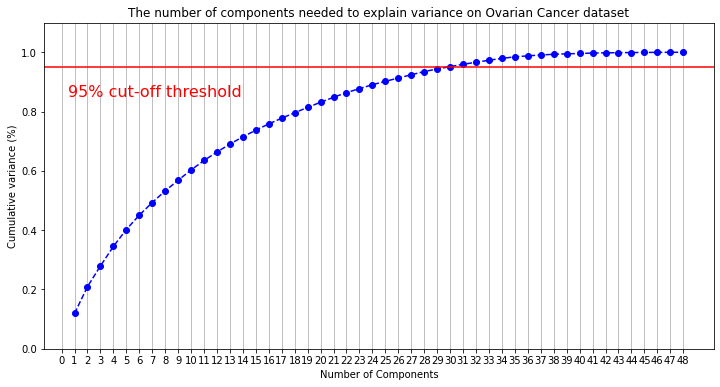

In [39]:
pca = PCA().fit(oc_dataset_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 49, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 49, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance on Ovarian Cancer dataset')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [40]:
# get raw eigen_vals
cov_mat_oc = np.cov(oc_dataset_scaled.T)
# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals_oc, eigen_vecs = np.linalg.eig(cov_mat_oc)
# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals_oc)

Raw Eigenvalues: 
 [5.73720597e+00 4.35079484e+00 3.35928577e+00 3.17424077e+00
 2.74975463e+00 2.33330635e+00 2.04641630e+00 1.89594195e+00
 1.72585905e+00 1.67232504e+00 1.54333771e+00 1.36482649e+00
 1.30050972e+00 1.16697737e+00 1.09197861e+00 1.01301467e+00
 9.29225116e-01 8.83073853e-01 8.72202037e-01 8.31173033e-01
 8.05398760e-01 7.61026479e-01 6.48298933e-01 6.30211301e-01
 5.48463674e-01 5.46786979e-01 5.21278304e-01 5.23741419e-01
 4.15989501e-01 3.87936054e-01 3.73846795e-01 3.34558067e-01
 3.23818367e-01 3.04024021e-01 2.49176134e-01 1.61891954e-01
 1.37408470e-01 1.19460796e-01 6.75437184e-02 6.60981639e-02
 5.96251851e-02 3.85661148e-02 1.02096940e-02 1.53989403e-02
 2.42939270e-02 1.80131270e-02 2.13299837e-02 5.85004651e-17]


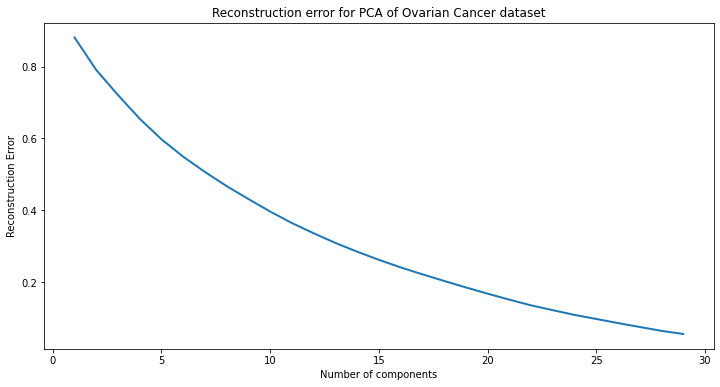

In [41]:
#Reconstruction Error
reconstruction_error = []
n_components = np.arange(1, 30, 1)
for comp in n_components:
    rp = PCA(n_components = comp)
    X_transformed = rp.fit_transform(oc_dataset_scaled)
    X_projected = inverse_transform_rp(rp, X_transformed, oc_dataset_scaled)
    reconstruction_error.append(((oc_dataset_scaled - X_projected) ** 2).mean())

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for PCA of Ovarian Cancer dataset')
plt.show()

### Independent Component Analysis

In [42]:
kurtosis_oc = kurtosis(oc_dataset_scaled)
skewness_oc = skew(oc_dataset_scaled)
print(kurtosis_oc)
print(skewness_oc)

[127.51220566   1.13166733  -0.90514453   0.49928865 158.23939283
   9.18311362  10.79443953   1.70692251   0.81362781   2.07881821
   8.64683691  14.22256485  38.43599724  79.08018772   1.73964259
   0.43915817   0.89349715  -1.96445478   6.82483299   5.42738332
   5.8930211   23.87318749   0.7040732   12.10947426   1.81980629
  33.40951658   2.1812701   11.3266581    0.55353782   0.5470457
  -0.57140178   4.22826755   4.65049519  -1.54243697   0.24213957
   2.30387654  13.29405753  -0.26218392   2.99036271   2.85900409
  -0.8044885    0.31106385  10.8341179    3.23477094   4.37847362
   9.20846763   4.44248948   5.53494969]
[11.21641922 -0.79246589  0.19601675 -0.77568996 10.89312925  2.61749485
  2.60735296  1.05825558  0.94517736  1.04226807 -2.87173185  3.62702955
  5.89906104  8.19104357 -0.37718315  0.23663345  0.63371151 -0.18853441
  2.05155701  2.08295848  2.08529459  4.14352758  0.57845243  3.01101968
 -0.34096127  5.16057287 -0.52860068  2.31919227 -0.10998644  0.5452038
 -

Text(0, 0.5, 'Kurtosis/Skewnewss vs features on Ovarian Cancer dataset')

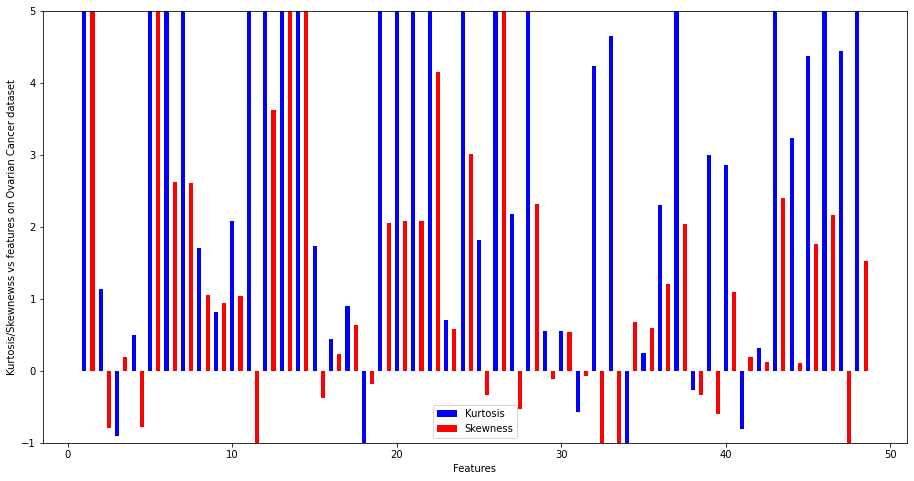

In [43]:
x = np.arange(1, 49, step=1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x + 0, kurtosis_oc, color = 'b', width = 0.25)
ax.bar(x + 0.5, skewness_oc, color = 'r', width = 0.25)
plt.ylim(-1, 5);
ax.legend(labels=['Kurtosis', 'Skewness'])
plt.xlabel("Features")
plt.ylabel("Kurtosis/Skewnewss vs features on Ovarian Cancer dataset")

d:\python_projects\cs7641_hw3\venv\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
d:\python_projects\cs7641_hw3\venv\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
d:\python_projects\cs7641_hw3\venv\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
d:\python_projects\cs7641_hw3\venv\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number 

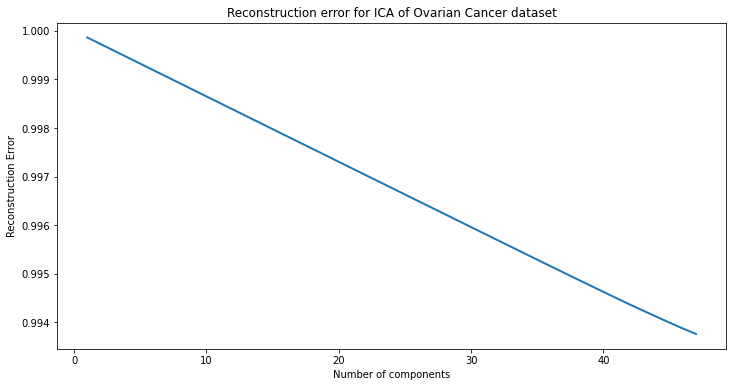

In [44]:
#Reconstruction Error of ICA
reconstruction_error = []
n_components = np.arange(1, 48, 1)
for comp in n_components:
    rp = FastICA(n_components = comp)
    X_transformed = rp.fit_transform(oc_dataset_scaled)
    X_projected = inverse_transform_rp(rp, X_transformed, oc_dataset_scaled)
    reconstruction_error.append(((oc_dataset_scaled - X_projected) ** 2).mean())

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for ICA of Ovarian Cancer dataset')
plt.show()

### Random Projection

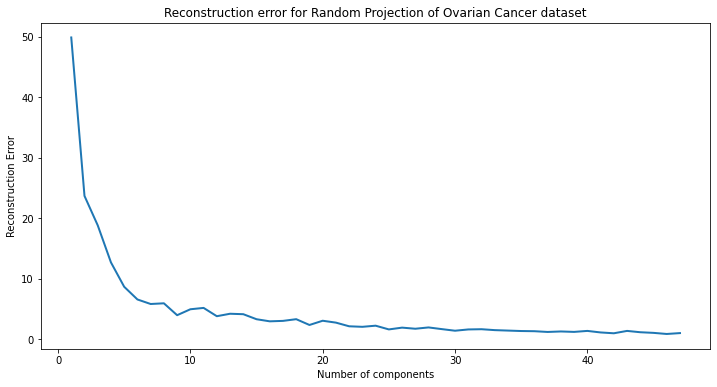

In [45]:
#Reconstruction Error
reconstruction_error = []
n_components = np.arange(1, 48, 1)
for comp in n_components:
    rp = GaussianRandomProjection(n_components = comp)
    X_transformed = rp.fit_transform(oc_dataset_scaled)
    X_projected = inverse_transform_rp(rp, X_transformed, oc_dataset_scaled)
    reconstruction_error.append(((oc_dataset_scaled - X_projected) ** 2).mean())

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for Random Projection of Ovarian Cancer dataset')
plt.show()


### Select features using Decision Tree feature importance

In [46]:
# split the oc_dataset into traning and testing set by ratio of 4
X_OC = oc_dataset.drop(['TYPE'], axis=1)
y_oc = oc_dataset["TYPE"]
X_train_oc, X_test_oc, y_train_oc, y_test_oc = train_test_split(X_OC, y_oc, test_size=0.2, random_state=0, stratify=y_oc)

Index(['Age', 'ALB', 'CA125', 'CEA', 'GLO', 'HE4', 'LYM%', 'Menopause'], dtype='object')


<AxesSubplot:>

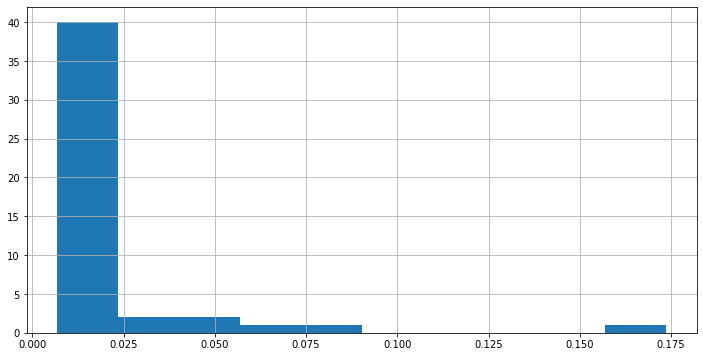

In [47]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_oc, y_train_oc)
sel.get_support()
selected_feat= X_train_oc.columns[(sel.get_support())]
print(selected_feat)
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [48]:
#Select features using decision tree
X_OC_selected = X_OC[selected_feat]
X_OC_scaled = scale(X_OC_selected)

#Using PCA to reduce the dimensionality for plotting
oc_data_dt = PCA(2).fit_transform(X_OC_scaled)

# Part III: Dimensionality Reduction and Clustering

## Dimensionality Reduction and Clustering on Breast Cancer dataset

### K-means clustering

In [49]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [50]:
##run k-means clustering on dimension reduced BC dataset
n_samples = 569
n_features = 30
n_digits = 2
sample_size = 500
labels = data["diagnosis"]

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=3),
              name="k-means++", data=X_scaled)
print(82 * '_')

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=3),
              name="random", data=X_scaled)

print(82 * '_')
pca = GaussianRandomProjection(n_components=2).fit_transform(X_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="RP-based-2",
              data=pca)
print(82 * '_')

pca = GaussianRandomProjection(n_components=10).fit_transform(X_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="RP-based-10",
              data=pca)
print(82 * '_')

pca = PCA(n_components=2).fit_transform(X_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="PCA-based-2",
              data=pca)
print(82 * '_')

pca = PCA(n_components=6).fit_transform(X_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="PCA-based-6",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=2).fit_transform(X_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="ICA-based-2",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=6).fit_transform(X_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="ICA-based-6",
              data=pca)
print(82 * '_')

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="DT-based",
              data=X_selected_scaled)
print(82 * '_')


k-means++	11595	0.525	0.540	0.532	0.654	0.532	0.336
__________________________________________________________________________________
random   	11595	0.525	0.540	0.532	0.654	0.532	0.345
__________________________________________________________________________________
RP-based-2	6298	0.045	0.043	0.044	0.051	0.043	0.388
__________________________________________________________________________________
RP-based-10	10829	0.575	0.589	0.582	0.700	0.581	0.391
__________________________________________________________________________________
PCA-based-2	5333	0.538	0.557	0.547	0.665	0.547	0.512
__________________________________________________________________________________
PCA-based-6	9679	0.551	0.573	0.562	0.677	0.561	0.379
__________________________________________________________________________________
ICA-based-2	1	0.525	0.542	0.534	0.654	0.533	0.433
__________________________________________________________________________________
ICA-based-6	5	0.712	0.752	0.732	0.792	0.731	0.180
___

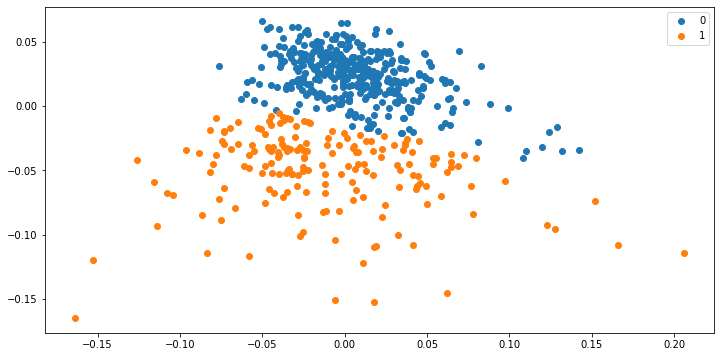

In [51]:
# Visualize the results on ICA-reduced data
ica_reduced_bcdata = FastICA(n_components=2).fit_transform(X_scaled)
bc_kmeans_ica = KMeans(init='k-means++', n_clusters=2, n_init=3)
bc_kmeans_ica.fit(ica_reduced_bcdata)
bckm_clusters_ica = kmeans.fit_predict(ica_reduced_bcdata)

#Getting unique labels
 
u_labels = np.unique(bckm_clusters_ica)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ica_reduced_bcdata[bckm_clusters_ica == i , 0] , ica_reduced_bcdata[bckm_clusters_ica == i , 1] , label = i)
plt.legend()
plt.show()

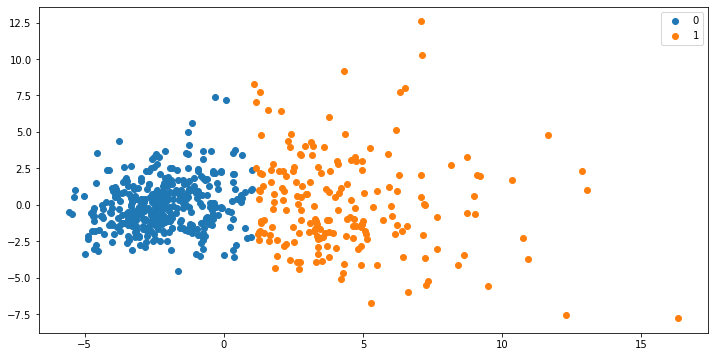

In [52]:
# Visualize the results on PCA-reduced data

pca_reduced_bcdata = PCA(2).fit_transform(X_scaled)
bc_kmeans_pca = KMeans(init='k-means++', n_clusters=2, n_init=3)
bc_kmeans_pca.fit(pca_reduced_bcdata)
bckm_clusters_pca = kmeans.fit_predict(pca_reduced_bcdata)

#Getting unique labels
 
u_labels = np.unique(bckm_clusters_pca)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_reduced_bcdata[bckm_clusters_pca == i , 0] , pca_reduced_bcdata[bckm_clusters_pca == i , 1] , label = i)
plt.legend()
plt.show()

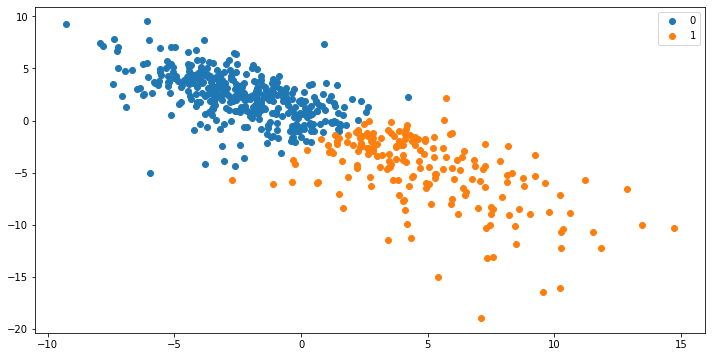

In [53]:
# #############################################################################
# Visualize the results on RP-reduced data


rp_reduced_bcdata = GaussianRandomProjection(n_components=2).fit_transform(X_scaled)
bc_kmeans_rp = KMeans(init='k-means++', n_clusters=n_digits, n_init=3)
bc_kmeans_rp.fit(rp_reduced_bcdata)
bckm_clusters_rp = kmeans.fit_predict(rp_reduced_bcdata)

#Getting unique labels
 
u_labels = np.unique(bckm_clusters_rp)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(rp_reduced_bcdata[bckm_clusters_rp == i , 0] , rp_reduced_bcdata[bckm_clusters_rp == i , 1] , label = i)
plt.legend()
plt.show()

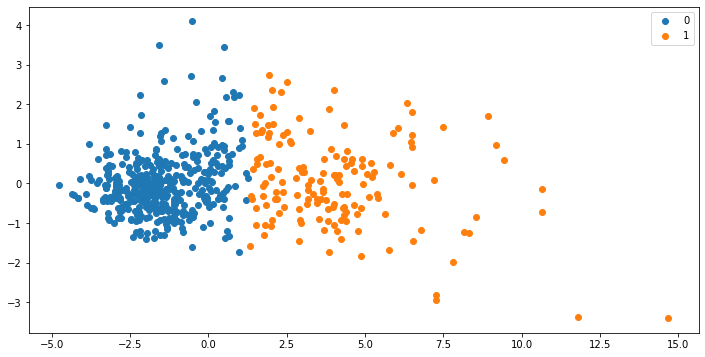

In [54]:
# Visualize the results on DT-reduced data

bc_kmeans_dt = KMeans(init='k-means++', n_clusters=n_digits, n_init=3)
bc_kmeans_dt.fit(X_selected_scaled)
bckm_clusters_dt = bc_kmeans_dt.fit_predict(X_selected_scaled)

#Getting unique labels
 
u_labels = np.unique(bckm_clusters_dt)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(bc_data_dt[bckm_clusters_dt == i , 0] , bc_data_dt[bckm_clusters_dt == i , 1] , label = i)
plt.legend()
plt.show()

### Expectation maximization

In [55]:
def bench_em(estimator, name, data):
    estimator.fit(data)
    clusters = estimator.fit_predict(data)
    print('%-9s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, metrics.homogeneity_score(labels, clusters),
             metrics.completeness_score(labels, clusters),
             metrics.v_measure_score(labels, clusters),
             metrics.adjusted_rand_score(labels, clusters),
             metrics.adjusted_mutual_info_score(labels,  clusters),
             metrics.silhouette_score(data, clusters,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [56]:
##run em clustering on dimension reduced BC dataset
n_samples = 569
n_features = 30
n_digits = 2
sample_size = 500
labels = data["diagnosis"]

gmm = GaussianMixture(n_components=2, covariance_type="full")

bench_em(gmm, name="GM", data=X_scaled)
print(82 * '_')

pca = GaussianRandomProjection(n_components=2).fit_transform(X_scaled)
bench_em(gmm,
              name="RP-based-2",
              data=pca)
print(82 * '_')

pca = GaussianRandomProjection(n_components=10).fit_transform(X_scaled)
bench_em(gmm,
              name="RP-based-10",
              data=pca)
print(82 * '_')

pca = PCA(n_components=2).fit_transform(X_scaled)
bench_em(gmm,
              name="PCA-based-2",
              data=pca)
print(82 * '_')

pca = PCA(n_components=6).fit_transform(X_scaled)
bench_em(gmm,
              name="PCA-based-6",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=2).fit_transform(X_scaled)
bench_em(gmm,
              name="ICA-based",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=6).fit_transform(X_scaled)
bench_em(gmm,
              name="ICA-based-6",
              data=pca)
print(82 * '_')


bench_em(gmm,
              name="DT-based",
              data=X_selected_scaled)
print(82 * '_')



GM       	0.662	0.660	0.661	0.774	0.661	0.308
__________________________________________________________________________________
RP-based-2	0.062	0.083	0.071	0.121	0.069	0.438
__________________________________________________________________________________
RP-based-10	0.299	0.303	0.301	0.412	0.300	0.296
__________________________________________________________________________________
PCA-based-2	0.540	0.532	0.536	0.655	0.535	0.483
__________________________________________________________________________________
PCA-based-6	0.398	0.380	0.389	0.457	0.388	0.272
__________________________________________________________________________________
ICA-based	0.533	0.526	0.529	0.649	0.529	0.408
__________________________________________________________________________________
ICA-based-6	0.653	0.654	0.653	0.768	0.653	0.168
__________________________________________________________________________________
DT-based 	0.637	0.641	0.639	0.755	0.639	0.509
__________________________________________

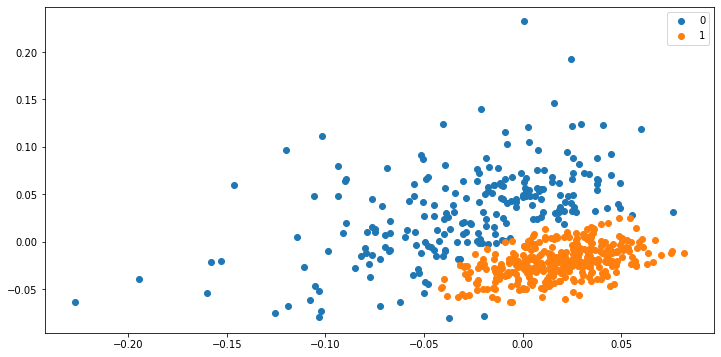

In [57]:
# Visualize the results on ICA-reduced data
ica_reduced_bcdata = FastICA(n_components=2).fit_transform(X_scaled)
bc_gmm_ica = GaussianMixture(n_components=2, covariance_type="full")
bc_gmm_ica.fit(ica_reduced_bcdata)
bcgm_clusters_ica = bc_gmm_ica.fit_predict(ica_reduced_bcdata)

#Getting unique labels
 
u_labels = np.unique(bcgm_clusters_ica)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ica_reduced_bcdata[bcgm_clusters_ica == i , 0] , ica_reduced_bcdata[bcgm_clusters_ica == i , 1] , label = i)
plt.legend()
plt.show()

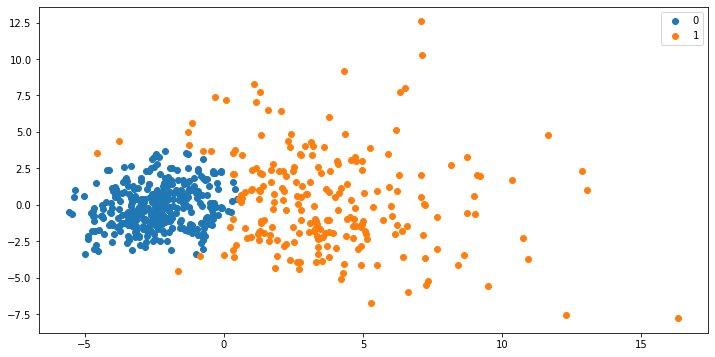

In [58]:
# Visualize the results on PCA-reduced data

pca_reduced_bcdata = PCA(2).fit_transform(X_scaled)
bc_gmm_pca = GaussianMixture(n_components=2, covariance_type="full")
bc_gmm_pca.fit(pca_reduced_bcdata)
bcgm_clusters_pca = bc_gmm_pca.fit_predict(pca_reduced_bcdata)

#Getting unique labels
 
u_labels = np.unique(bcgm_clusters_pca)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_reduced_bcdata[bcgm_clusters_pca == i , 0] , pca_reduced_bcdata[bcgm_clusters_pca == i , 1] , label = i)
plt.legend()
plt.show()

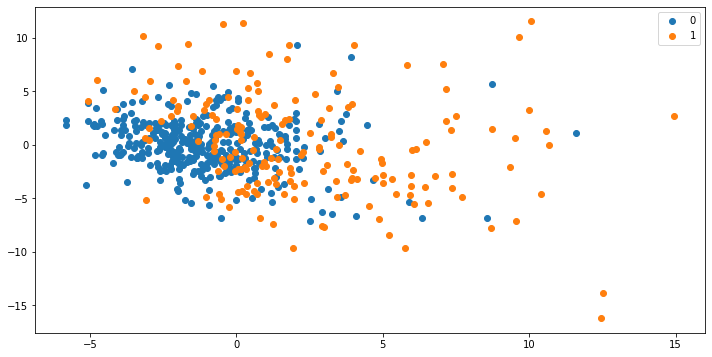

In [59]:
# #############################################################################
# Visualize the results on RP-reduced data


rp_reduced_bcdata = GaussianRandomProjection(n_components=2).fit_transform(X_scaled)
bc_gmm_rp = GaussianMixture(n_components=2, covariance_type="full")
bc_gmm_rp.fit(rp_reduced_bcdata)
bcgm_clusters_rp = bc_gmm_rp.fit_predict(rp_reduced_bcdata)

#Getting unique labels
 
u_labels = np.unique(bckm_clusters_rp)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(rp_reduced_bcdata[bckm_clusters_rp == i , 0] , rp_reduced_bcdata[bckm_clusters_rp == i , 1] , label = i)
plt.legend()
plt.show()

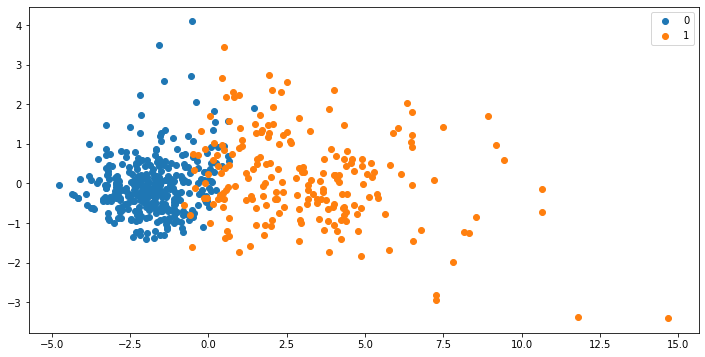

In [60]:
# Visualize the results on DT-reduced data

bc_gmm_dt = GaussianMixture(n_components=2, covariance_type="full")
bc_gmm_dt.fit(X_selected_scaled)
bcgm_clusters_dt = bc_gmm_dt.fit_predict(X_selected_scaled)

#Getting unique labels
 
u_labels = np.unique(bcgm_clusters_dt)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(bc_data_dt[bcgm_clusters_dt == i , 0] , bc_data_dt[bcgm_clusters_dt == i , 1] , label = i)
plt.legend()
plt.show()

Text(605.1597826086957, 0.5, 'PCA 2')

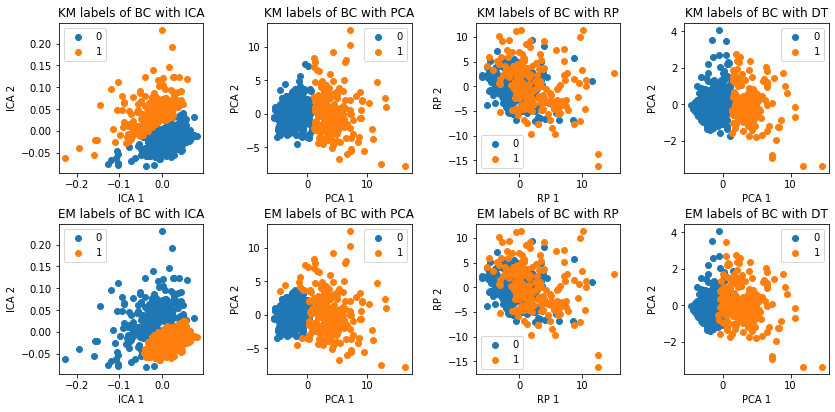

In [61]:
#Summary plot of KM and EM on BC with DR
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
fig.tight_layout(pad=3.0)

# km label of BC plot against first and second ica
#Getting unique labels

u_labels1 = np.unique(bckm_clusters_ica)
#plotting the results:
for i in u_labels:
    ax1.scatter(ica_reduced_bcdata[bckm_clusters_ica == i , 0] , ica_reduced_bcdata[bckm_clusters_ica == i , 1] , label = i)
ax1.legend()
ax1.set_title("KM labels of BC with ICA")
ax1.set_xlabel("ICA 1")
ax1.set_ylabel("ICA 2")


# k-means label of BC plot against first and second pca
#Getting unique labels
#Getting unique labels
 
u_labels2 = np.unique(bckm_clusters_pca)
#plotting the results:
for i in u_labels2:
    ax2.scatter(pca_reduced_bcdata[bckm_clusters_pca == i , 0] , pca_reduced_bcdata[bckm_clusters_pca == i , 1] , label = i)
ax2.legend()
ax2.set_title("KM labels of BC with PCA")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")


# k-means label of BC plot against first and second rp
#Getting unique labels
u_labels3 = np.unique(bckm_clusters_rp)
#plotting the results:
for i in u_labels3:
    ax3.scatter(rp_reduced_bcdata[bckm_clusters_rp == i , 0] , rp_reduced_bcdata[bckm_clusters_rp == i , 1] , label = i)
ax3.legend()
ax3.set_title("KM labels of BC with RP")
ax3.set_xlabel("RP 1")
ax3.set_ylabel("RP 2")

# k-means label of BC plot against first and second pca with DT
#Getting unique labels
u_labels4 = np.unique(bckm_clusters_dt)
#plotting the results:
for i in u_labels4:
    ax4.scatter(bc_data_dt[bckm_clusters_dt == i , 0] , bc_data_dt[bckm_clusters_dt == i , 1] , label = i)
ax4.legend()
ax4.set_title("KM labels of BC with DT")
ax4.set_xlabel("PCA 1")
ax4.set_ylabel("PCA 2")

# em label of BC plot against first and second ica
#Getting unique labels
u_labels5 = np.unique(bcgm_clusters_ica) 
#plotting the results:
for i in u_labels5:
    ax5.scatter(ica_reduced_bcdata[bcgm_clusters_ica == i , 0] , ica_reduced_bcdata[bcgm_clusters_ica == i , 1] , label = i)
ax5.legend()
ax5.set_title("EM labels of BC with ICA")
ax5.set_xlabel("ICA 1")
ax5.set_ylabel("ICA 2")


# em label of BC plot against first and second pca
#Getting unique labels
u_labels6 = np.unique(bcgm_clusters_pca)
#plotting the results:
for i in u_labels6:
    ax6.scatter(pca_reduced_bcdata[bcgm_clusters_pca == i , 0] , pca_reduced_bcdata[bcgm_clusters_pca == i , 1] , label = i)
ax6.legend()
ax6.set_title("EM labels of BC with PCA")
ax6.set_xlabel("PCA 1")
ax6.set_ylabel("PCA 2")

# em label of BC plot against first and second rp
#Getting unique labels
u_labels7 = np.unique(bckm_clusters_rp)
#plotting the results:
for i in u_labels7:
    ax7.scatter(rp_reduced_bcdata[bckm_clusters_rp == i , 0] , rp_reduced_bcdata[bckm_clusters_rp == i , 1] , label = i)
ax7.legend()
ax7.set_title("EM labels of BC with RP")
ax7.set_xlabel("RP 1")
ax7.set_ylabel("RP 2")

# em label of BC plot against first and second pca with DT
#Getting unique labels
u_labels8 = np.unique(bcgm_clusters_dt)
#plotting the results:
for i in u_labels8:
    ax8.scatter(bc_data_dt[bcgm_clusters_dt == i , 0] , bc_data_dt[bcgm_clusters_dt == i , 1] , label = i)
ax8.legend()
ax8.set_title("EM labels of BC with DT")
ax8.set_xlabel("PCA 1")
ax8.set_ylabel("PCA 2")

## Dimensionality Reduction and Clustering on Ovarian Cancer dataset

### K-means Clustering

In [62]:
##run k-means clustering on dimension reduced OC dataset
oc_n_samples = 309
oc_n_features = 48
oc_n_digits = 2
oc_sample_size = 300
oc_labels = oc_label

def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(oc_labels, estimator.labels_),
             metrics.completeness_score(oc_labels, estimator.labels_),
             metrics.v_measure_score(oc_labels, estimator.labels_),
             metrics.adjusted_rand_score(oc_labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(oc_labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=oc_sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=3),
              name="k-means++", data=oc_dataset_scaled)
print(82 * '_')

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=3),
              name="random", data=oc_dataset_scaled)
print(82 * '_')

pca = GaussianRandomProjection(n_components=2).fit_transform(oc_dataset_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="RP-based-2",
              data=pca)
print(82 * '_')

pca = GaussianRandomProjection(n_components=15).fit_transform(oc_dataset_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="RP-based-15",
              data=pca)
print(82 * '_')

pca = PCA(n_components=2).fit_transform(oc_dataset_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="PCA-based-2",
              data=pca)
print(82 * '_')

pca = PCA(n_components=16).fit_transform(oc_dataset_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="PCA-based-16",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=2).fit_transform(oc_dataset_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="ICA-based-2",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=16).fit_transform(oc_dataset_scaled)
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="ICA-based-16",
              data=pca)
print(82 * '_')


bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=1),
              name="DT-based",
              data=X_OC_scaled)
print(82 * '_')


k-means++	13700	0.192	0.215	0.203	0.242	0.201	0.136
__________________________________________________________________________________
random   	13688	0.209	0.287	0.242	0.204	0.240	0.203
__________________________________________________________________________________
RP-based-2	9439	0.004	0.004	0.004	0.001	0.001	0.341
__________________________________________________________________________________
RP-based-15	12862	0.096	0.126	0.109	0.115	0.107	0.276
__________________________________________________________________________________
PCA-based-2	1998	0.276	0.337	0.304	0.296	0.302	0.398
__________________________________________________________________________________
PCA-based-16	10126	0.314	0.349	0.331	0.372	0.329	0.173
__________________________________________________________________________________
ICA-based-2	1	0.300	0.341	0.320	0.348	0.318	0.378
__________________________________________________________________________________
ICA-based-16	15	0.156	0.157	0.157	0.212	0.155	0.070

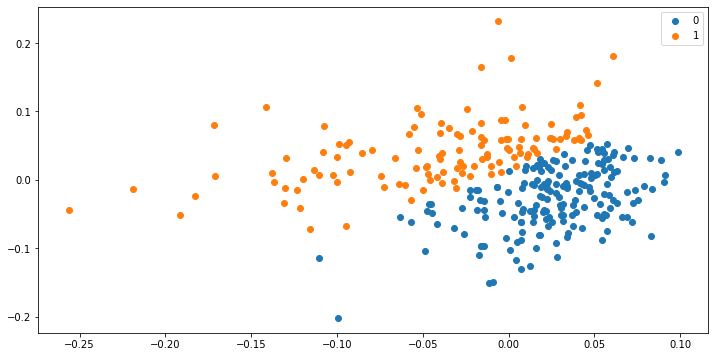

In [63]:
# Visualize the results on ICA-reduced data
# Visualize the results on ICA-reduced data
ica_reduced_ocdata = FastICA(n_components=2).fit_transform(oc_dataset_scaled)
oc_kmeans_ica = KMeans(init='k-means++', n_clusters=2, n_init=3)
oc_kmeans_ica.fit(ica_reduced_ocdata)
ockm_clusters_ica = kmeans.fit_predict(ica_reduced_ocdata)

#Getting unique labels
 
u_labels = np.unique(ockm_clusters_ica)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ica_reduced_ocdata[ockm_clusters_ica == i , 0] , ica_reduced_ocdata[ockm_clusters_ica == i , 1] , label = i)
plt.legend()
plt.show()


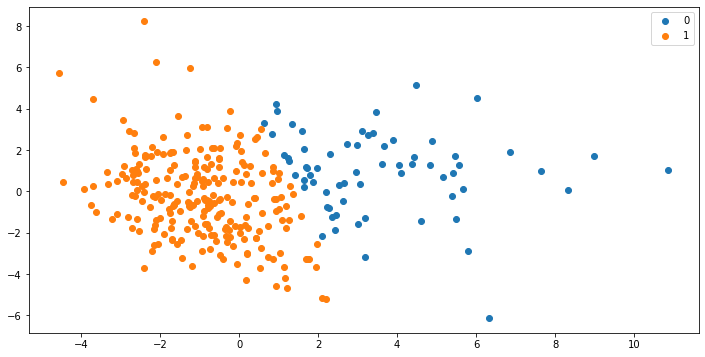

In [64]:
# #############################################################################
# Visualize the results on PCA-reduced data
# Visualize the results on PCA-reduced data

pca_reduced_ocdata = PCA(2).fit_transform(oc_dataset_scaled)
oc_kmeans_pca = KMeans(init='k-means++', n_clusters=2, n_init=3)
oc_kmeans_pca.fit(pca_reduced_ocdata)
ockm_clusters_pca = kmeans.fit_predict(pca_reduced_ocdata)

#Getting unique labels
 
u_labels = np.unique(ockm_clusters_pca)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_reduced_ocdata[ockm_clusters_pca == i , 0] , pca_reduced_ocdata[ockm_clusters_pca == i , 1] , label = i)
plt.legend()
plt.show()


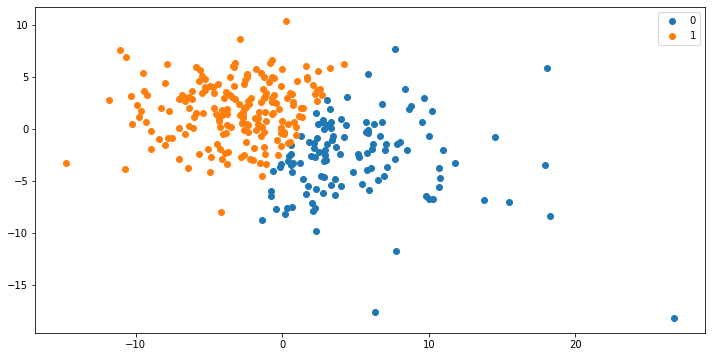

In [65]:
# #############################################################################
# Visualize the results on RP-reduced data


rp_reduced_ocdata = GaussianRandomProjection(n_components=2).fit_transform(oc_dataset_scaled)
oc_kmeans_rp = KMeans(init='k-means++', n_clusters=n_digits, n_init=3)
oc_kmeans_rp.fit(rp_reduced_ocdata)
ockm_clusters_rp = kmeans.fit_predict(rp_reduced_ocdata)

#Getting unique labels
 
u_labels = np.unique(ockm_clusters_rp)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(rp_reduced_ocdata[ockm_clusters_rp == i , 0] , rp_reduced_ocdata[ockm_clusters_rp == i , 1] , label = i)
plt.legend()
plt.show()


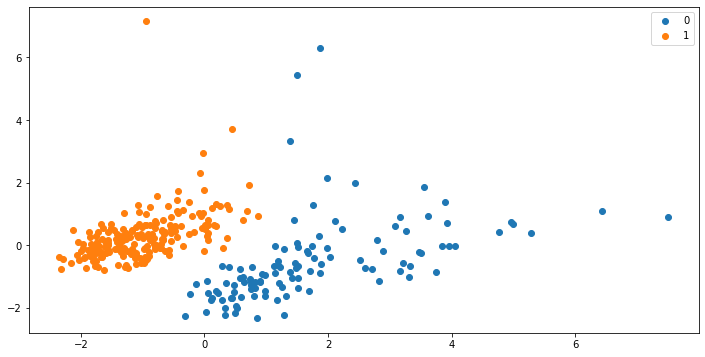

In [66]:
# Visualize the results on DT-reduced data

oc_kmeans_dt = KMeans(init='k-means++', n_clusters=2, n_init=3)
oc_kmeans_dt.fit(X_OC_scaled)
ockm_clusters_dt = bc_kmeans_dt.fit_predict(X_OC_scaled)

#Getting unique labels
 
u_labels = np.unique(ockm_clusters_dt)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(oc_data_dt[ockm_clusters_dt == i , 0] , oc_data_dt[ockm_clusters_dt == i , 1] , label = i)
plt.legend()
plt.show()

### Expectation Maximization

In [67]:
##run EM clustering on dimension reduced OC dataset
def bench_em(estimator, name, data):
    estimator.fit(data)
    clusters = estimator.fit_predict(data)
    print('%-9s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, metrics.homogeneity_score(oc_labels, clusters),
             metrics.completeness_score(oc_labels, clusters),
             metrics.v_measure_score(oc_labels, clusters),
             metrics.adjusted_rand_score(oc_labels, clusters),
             metrics.adjusted_mutual_info_score(oc_labels,  clusters),
             metrics.silhouette_score(data, clusters,
                                      metric='euclidean',
                                      sample_size=oc_sample_size)))

    
oc_n_samples = 309
oc_n_features = 48
oc_n_digits = 2
oc_sample_size = 300
oc_labels = oc_label

gmm = GaussianMixture(n_components=2, covariance_type="full")

bench_em(gmm, name="GM", data=oc_dataset_scaled)
print(82 * '_')

pca = GaussianRandomProjection(n_components=2).fit_transform(oc_dataset_scaled)
bench_em(gmm,
              name="RP-based-2",
              data=pca)
print(82 * '_')


pca = GaussianRandomProjection(n_components=15).fit_transform(oc_dataset_scaled)
bench_em(gmm,
              name="RP-based-15",
              data=pca)
print(82 * '_')

pca = PCA(n_components=2).fit_transform(oc_dataset_scaled)
bench_em(gmm,
              name="PCA-based-2",
              data=pca)
print(82 * '_')

pca = PCA(n_components=16).fit_transform(oc_dataset_scaled)
bench_em(gmm,
              name="PCA-based-16",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=2).fit_transform(oc_dataset_scaled)
bench_em(gmm,
              name="ICA-based-2",
              data=pca)
print(82 * '_')

pca = FastICA(n_components=16).fit_transform(oc_dataset_scaled)
bench_em(gmm,
              name="ICA-based-16",
              data=pca)
print(82 * '_')

bench_em(gmm,
              name="DT-based",
              data=X_OC_scaled)
print(82 * '_')


GM       	0.171	0.253	0.204	0.159	0.202	0.240
__________________________________________________________________________________
RP-based-2	0.034	0.062	0.044	0.038	0.041	0.493
__________________________________________________________________________________
RP-based-15	0.060	0.089	0.071	0.070	0.069	0.242
__________________________________________________________________________________
PCA-based-2	0.179	0.228	0.200	0.198	0.198	0.414
__________________________________________________________________________________
PCA-based-16	0.174	0.281	0.215	0.143	0.212	0.278
__________________________________________________________________________________
ICA-based-2	0.267	0.308	0.286	0.311	0.284	0.382
__________________________________________________________________________________
ICA-based-16	0.000	0.000	0.000	-0.004	-0.002	0.094
__________________________________________________________________________________
DT-based 	0.402	0.438	0.419	0.464	0.418	0.238
____________________________________

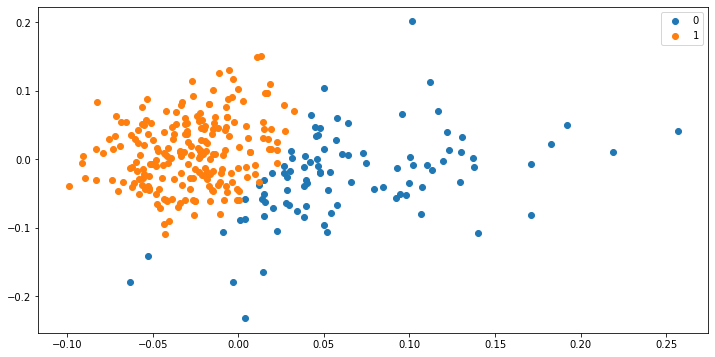

In [68]:
# Visualize the results on ICA-reduced data
# Visualize the results on ICA-reduced data
ica_reduced_ocdata = FastICA(n_components=2).fit_transform(oc_dataset_scaled)
oc_gmm_ica = GaussianMixture(n_components=2, covariance_type="full")
oc_gmm_ica.fit(ica_reduced_ocdata)
ocem_clusters_ica = oc_gmm_ica.fit_predict(ica_reduced_ocdata)

#Getting unique labels
 
u_labels = np.unique(ocem_clusters_ica)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ica_reduced_ocdata[ocem_clusters_ica == i , 0] , ica_reduced_ocdata[ocem_clusters_ica == i , 1] , label = i)
plt.legend()
plt.show()


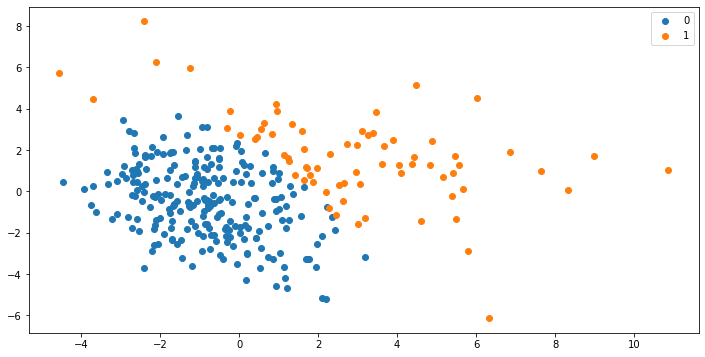

In [69]:
# #############################################################################
# Visualize the results on PCA-reduced data
# Visualize the results on PCA-reduced data

pca_reduced_ocdata = PCA(2).fit_transform(oc_dataset_scaled)
oc_gmm_pca = GaussianMixture(n_components=2, covariance_type="full")
oc_gmm_pca.fit(pca_reduced_ocdata)
ocem_clusters_pca = oc_gmm_pca.fit_predict(pca_reduced_ocdata)


#Getting unique labels
 
u_labels = np.unique(ocem_clusters_pca)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pca_reduced_ocdata[ocem_clusters_pca == i , 0] , pca_reduced_ocdata[ocem_clusters_pca == i , 1] , label = i)
plt.legend()
plt.show()

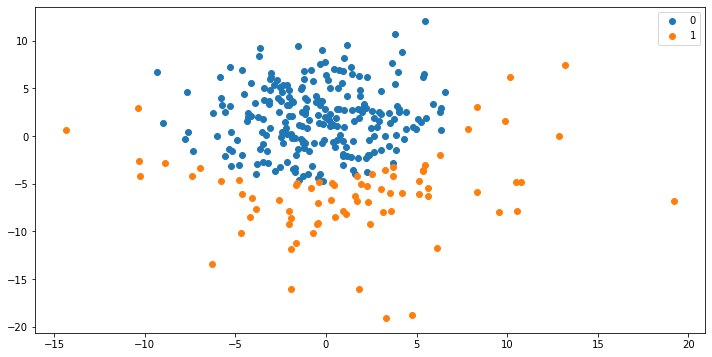

In [70]:
# #############################################################################
# Visualize the results on RP-reduced data


rp_reduced_ocdata = GaussianRandomProjection(n_components=2).fit_transform(oc_dataset_scaled)
oc_gmm_rp = GaussianMixture(n_components=2, covariance_type="full")
oc_gmm_rp.fit(rp_reduced_ocdata)
ocem_clusters_rp = oc_gmm_rp.fit_predict(rp_reduced_ocdata)
#Getting unique labels
 
u_labels = np.unique(ocem_clusters_rp)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(rp_reduced_ocdata[ocem_clusters_rp == i , 0] , rp_reduced_ocdata[ocem_clusters_rp == i , 1] , label = i)
plt.legend()
plt.show()


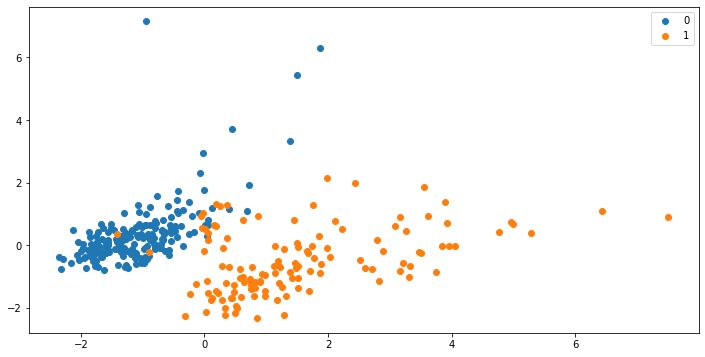

In [71]:
# Visualize the results on DT-reduced data

oc_gmm_dt = GaussianMixture(n_components=2, covariance_type="full")
oc_gmm_dt.fit(X_OC_scaled)
ocem_clusters_dt = oc_gmm_rp.fit_predict(X_OC_scaled)

#Getting unique labels
 
u_labels = np.unique(ocem_clusters_dt)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(oc_data_dt[ocem_clusters_dt == i , 0] , oc_data_dt[ocem_clusters_dt == i , 1] , label = i)
plt.legend()
plt.show()

Text(605.1597826086957, 0.5, 'PCA 2')

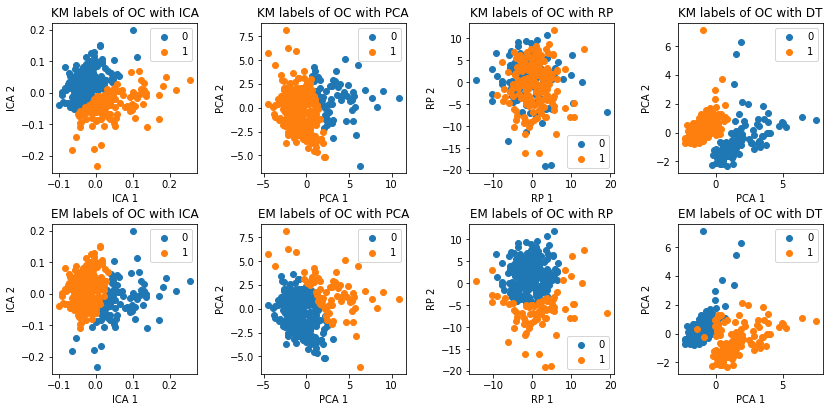

In [72]:
#Summary plot of KM and EM on OC with DR
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
fig.tight_layout(pad=3.0)

# km label of BC plot against first and second ica
#Getting unique labels

u_labels1 = np.unique(ockm_clusters_ica)
#plotting the results:
for i in u_labels:
    ax1.scatter(ica_reduced_ocdata[ockm_clusters_ica == i , 0] , ica_reduced_ocdata[ockm_clusters_ica == i , 1] , label = i)
ax1.legend()
ax1.set_title("KM labels of OC with ICA")
ax1.set_xlabel("ICA 1")
ax1.set_ylabel("ICA 2")


# k-means label of BC plot against first and second pca
#Getting unique labels
#Getting unique labels
 
u_labels2 = np.unique(ockm_clusters_pca)
#plotting the results:
for i in u_labels2:
    ax2.scatter(pca_reduced_ocdata[ockm_clusters_pca == i , 0] , pca_reduced_ocdata[ockm_clusters_pca == i , 1] , label = i)
ax2.legend()
ax2.set_title("KM labels of OC with PCA")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")


# k-means label of BC plot against first and second rp
#Getting unique labels
u_labels3 = np.unique(ockm_clusters_rp)
#plotting the results:
for i in u_labels3:
    ax3.scatter(rp_reduced_ocdata[ockm_clusters_rp == i , 0] , rp_reduced_ocdata[ockm_clusters_rp == i , 1] , label = i)
ax3.legend()
ax3.set_title("KM labels of OC with RP")
ax3.set_xlabel("RP 1")
ax3.set_ylabel("RP 2")

# k-means label of BC plot against first and second pca with DT
#Getting unique labels
u_labels4 = np.unique(ockm_clusters_dt)
#plotting the results:
for i in u_labels4:
    ax4.scatter(oc_data_dt[ockm_clusters_dt == i , 0] , oc_data_dt[ockm_clusters_dt == i , 1] , label = i)
ax4.legend()
ax4.set_title("KM labels of OC with DT")
ax4.set_xlabel("PCA 1")
ax4.set_ylabel("PCA 2")

# em label of BC plot against first and second ica
#Getting unique labels
u_labels5 = np.unique(ocem_clusters_ica) 
#plotting the results:
for i in u_labels5:
    ax5.scatter(ica_reduced_ocdata[ocem_clusters_ica == i , 0] , ica_reduced_ocdata[ocem_clusters_ica == i , 1] , label = i)
ax5.legend()
ax5.set_title("EM labels of OC with ICA")
ax5.set_xlabel("ICA 1")
ax5.set_ylabel("ICA 2")


# em label of BC plot against first and second pca
#Getting unique labels
u_labels6 = np.unique(ocem_clusters_pca)
#plotting the results:
for i in u_labels6:
    ax6.scatter(pca_reduced_ocdata[ocem_clusters_pca == i , 0] , pca_reduced_ocdata[ocem_clusters_pca == i , 1] , label = i)
ax6.legend()
ax6.set_title("EM labels of OC with PCA")
ax6.set_xlabel("PCA 1")
ax6.set_ylabel("PCA 2")

# em label of BC plot against first and second rp
#Getting unique labels
u_labels7 = np.unique(ocem_clusters_rp)
#plotting the results:
for i in u_labels7:
    ax7.scatter(rp_reduced_ocdata[ocem_clusters_rp == i , 0] , rp_reduced_ocdata[ocem_clusters_rp == i , 1] , label = i)
ax7.legend()
ax7.set_title("EM labels of OC with RP")
ax7.set_xlabel("RP 1")
ax7.set_ylabel("RP 2")

# em label of BC plot against first and second pca with DT
#Getting unique labels
u_labels8 = np.unique(ocem_clusters_dt)
#plotting the results:
for i in u_labels8:
    ax8.scatter(oc_data_dt[ocem_clusters_dt == i , 0] , oc_data_dt[ocem_clusters_dt == i , 1] , label = i)
ax8.legend()
ax8.set_title("EM labels of OC with DT")
ax8.set_xlabel("PCA 1")
ax8.set_ylabel("PCA 2")